In [59]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [60]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Capstone Project/Health care/health care diabetes.csv')

### EDA

In [61]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [62]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### Treating Null values

In [63]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Even though there are no null values in the data set, when we observe the description of the data set, it is observed that minimum value of 'Glucose','BloodPressure','SkinThickness','Insulin','BMI' is 0 which can not be possible. So these are considered as null values.
  Thus, 0 in these columns will be replaced with np.nan for missing value treatment.
  

In [64]:
#creating a separate dataframe with required columns
raw_data = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]

In [65]:
raw_data.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI
0,148,72,35,0,33.6
1,85,66,29,0,26.6
2,183,64,0,0,23.3
3,89,66,23,94,28.1
4,137,40,35,168,43.1


In [66]:
# replacing 0 with np.nan so that imputation can be done
raw_data.replace(0, np.nan, inplace = True )

In [67]:
# fnding the number of null values in the data set correspondin to each column
null_values = raw_data.isnull().sum()

In [68]:
null_values

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

In [69]:
type(null_values)

pandas.core.series.Series

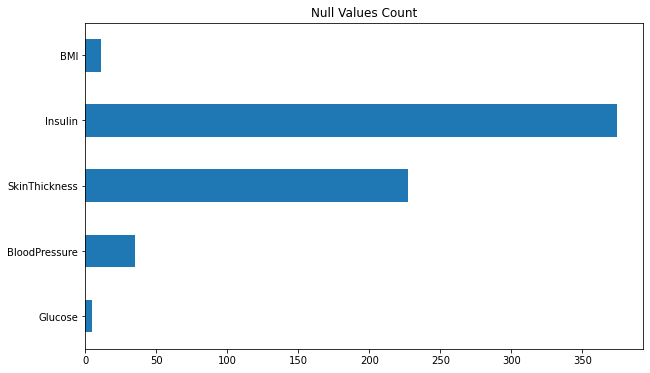

In [70]:
# plotting the bar graph to show number of null values in the each column
plt.figure(figsize = [10,6])
null_values.plot(kind = 'barh')
plt.title('Null Values Count')
plt.show()

#### Missing value treatment using sklearn SimpleImputer and strategy= median

In [71]:
from sklearn.impute import SimpleImputer

In [72]:
imputer = SimpleImputer(strategy='median')

In [73]:
imputer.fit(raw_data)
X= imputer.transform(raw_data)

In [74]:
X

array([[148. ,  72. ,  35. , 125. ,  33.6],
       [ 85. ,  66. ,  29. , 125. ,  26.6],
       [183. ,  64. ,  29. , 125. ,  23.3],
       ...,
       [121. ,  72. ,  23. , 112. ,  26.2],
       [126. ,  60. ,  29. , 125. ,  30.1],
       [ 93. ,  70. ,  31. , 125. ,  30.4]])

In [75]:
data = pd.DataFrame(X, columns = raw_data.columns)

In [76]:
data.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI
0,148.0,72.0,35.0,125.0,33.6
1,85.0,66.0,29.0,125.0,26.6
2,183.0,64.0,29.0,125.0,23.3
3,89.0,66.0,23.0,94.0,28.1
4,137.0,40.0,35.0,168.0,43.1


In [77]:
#Checking for the null values after iputation. 
data.isnull().sum()

Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
dtype: int64

Above results shows that imputation is successful.

In [78]:
#Adding remaining columns Pregnancies,Age,DiabetesPedigreeFunction and target to this dataframe
data['Pregnancies'] = df['Pregnancies']
data['Age'] = df['Age']
data['DiabetesPedigreeFunction'] = df['DiabetesPedigreeFunction']
data['target'] = df['Outcome']

In [79]:
# Clean data after treating the null values
data.head()


,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pregnancies,Age,DiabetesPedigreeFunction,target
0,148.0,72.0,35.0,125.0,33.6,6,50,0.627,1
1,85.0,66.0,29.0,125.0,26.6,1,31,0.351,0
2,183.0,64.0,29.0,125.0,23.3,8,32,0.672,1
3,89.0,66.0,23.0,94.0,28.1,1,21,0.167,0
4,137.0,40.0,35.0,168.0,43.1,0,33,2.288,1


In [80]:
#Saving the cleaned data to the local machine to use it in Tableau for the further visualization.
data.to_excel('Cleaned Health Care data.xlsx', index = False)

#### Plotting different feature frequencies on histogram

In [81]:
# Creating a list with all the features to run a loop for histograms.
columns = list(data.columns)

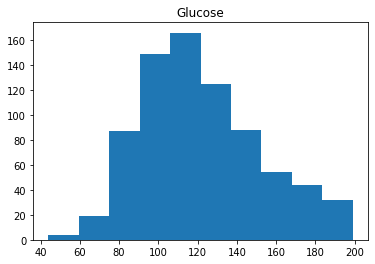

<Figure size 720x576 with 0 Axes>

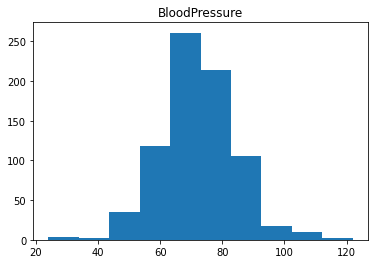

<Figure size 720x576 with 0 Axes>

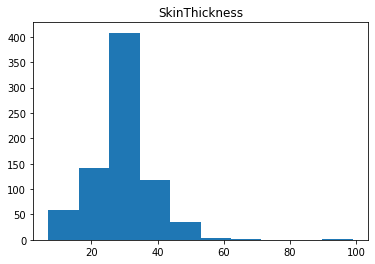

<Figure size 720x576 with 0 Axes>

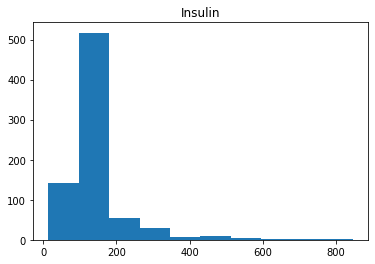

<Figure size 720x576 with 0 Axes>

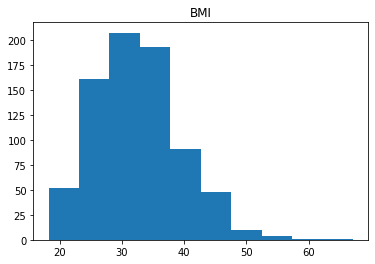

<Figure size 720x576 with 0 Axes>

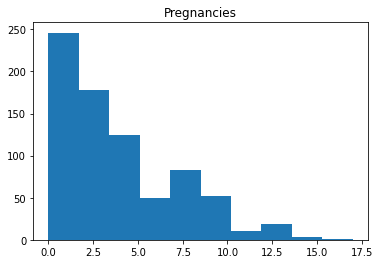

<Figure size 720x576 with 0 Axes>

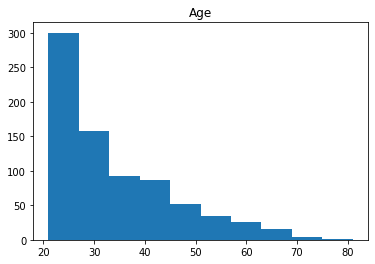

<Figure size 720x576 with 0 Axes>

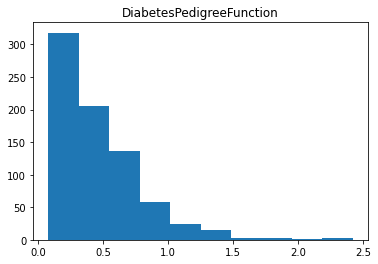

<Figure size 720x576 with 0 Axes>

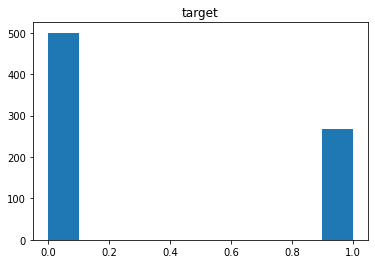

<Figure size 720x576 with 0 Axes>

In [82]:
# Creating a loop to create histogram for all the features to display their frequency.
for x in columns:
  plt.hist(x = data[x])
  plt.title(x)
  plt.figure(figsize = [10,8])
  plt.show()
  print('\n')

#### Counting different datatypes in the dataset and plotting the count of datatypes

In [83]:
# getting the info of the data set
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   768 non-null    float64
 1   BloodPressure             768 non-null    float64
 2   SkinThickness             768 non-null    float64
 3   Insulin                   768 non-null    float64
 4   BMI                       768 non-null    float64
 5   Pregnancies               768 non-null    int64  
 6   Age                       768 non-null    int64  
 7   DiabetesPedigreeFunction  768 non-null    float64
 8   target                    768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [84]:
# to know the count of data types in the data
data.dtypes.value_counts()

float64    6
int64      3
dtype: int64

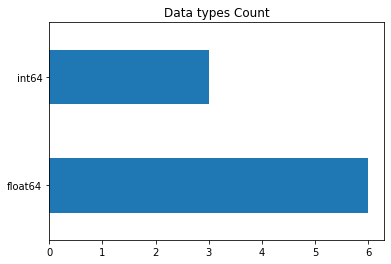

In [85]:
# plotting the count of different datatypes in the dataset
data.dtypes.value_counts().plot(kind = 'barh' , title = 'Data types Count')
plt.show()

#### Checking the balance of data 

In [86]:
#checking the no. of observations of the dataset using len()
len(data['target'])

768

In [87]:
# no of diabetic and non-diabetic observations in the dataset
(data['target'].groupby(data.target).count())

target
0    500
1    268
Name: target, dtype: int64

In [88]:
# calculating the % of diabetic and non-diabetic observations in the dataset
round((data['target'].groupby(data.target).count())*100/len(data.target), 2)

target
0    65.1
1    34.9
Name: target, dtype: float64

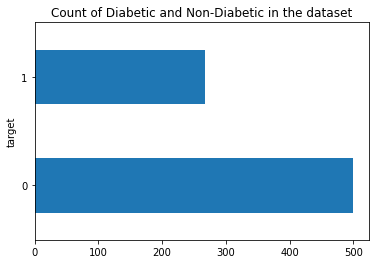

In [89]:
# plotting the count of no. of diabetic and non-diabetic observations
data.target.groupby(data.target).count().plot(kind = 'barh', title = 'Count of Diabetic and Non-Diabetic in the dataset')
plt.show()

From the above outcomes it can be observed that only 34.9% of the observations are Diabetic and rest 65.1% of observations are non-diabetic.As the sample is biased,model may have more influence of majority output. Thus, resampling will be the obvious choice to avoid this problem. 

#### Resampling the data to avoid imbalance:

In [90]:
#importing resample from the sklearn utility library
from sklearn.utils import resample

In [91]:
# dividing the data into diabetic and non diabetic for resampling the diabating data as its number in the data set is very less approx 35%
diabetic_data = data[data.target == 1]
non_diabetic_data = data[data.target == 0]
type(non_diabetic_data)

pandas.core.frame.DataFrame

In [92]:
# checking the head of the diabetic sample
diabetic_data.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pregnancies,Age,DiabetesPedigreeFunction,target
0,148.0,72.0,35.0,125.0,33.6,6,50,0.627,1
2,183.0,64.0,29.0,125.0,23.3,8,32,0.672,1
4,137.0,40.0,35.0,168.0,43.1,0,33,2.288,1
6,78.0,50.0,32.0,88.0,31.0,3,26,0.248,1
8,197.0,70.0,45.0,543.0,30.5,2,53,0.158,1


In [93]:
# ckecking the length of the diabetic sample
len(diabetic_data)

268

In [94]:
# upsampling the diabetic data using resample method.  No.of samples required n_samples = 500
upsample = resample(diabetic_data, n_samples= 500, replace= True, random_state=3 )

In [95]:
len(upsample)

500

In [96]:
upsample.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pregnancies,Age,DiabetesPedigreeFunction,target
400,95.0,64.0,29.0,125.0,32.0,4,31,0.161,1
719,97.0,76.0,27.0,125.0,35.6,5,52,0.378,1
338,152.0,78.0,34.0,171.0,34.2,9,33,0.893,1
743,140.0,94.0,29.0,125.0,32.7,9,45,0.734,1
388,144.0,82.0,26.0,285.0,32.0,5,58,0.452,1


In [97]:
type(upsample)

pandas.core.frame.DataFrame

In [98]:
# concating the dataframes non diabetic data and upsampled diabetic data and naming it as df_data
df_data = pd.concat([non_diabetic_data,upsample], sort = True, ignore_index= True)

In [99]:
len(df_data)

1000

In [100]:
df_data

,Age,BMI,BloodPressure,DiabetesPedigreeFunction,Glucose,Insulin,Pregnancies,SkinThickness,target
0,31,26.6,66.0,0.351,85.0,125.0,1,29.0,0
1,21,28.1,66.0,0.167,89.0,94.0,1,23.0,0
2,30,25.6,74.0,0.201,116.0,125.0,5,29.0,0
3,29,35.3,72.0,0.134,115.0,125.0,10,29.0,0
4,30,37.6,92.0,0.191,110.0,125.0,4,29.0,0
...,...,...,...,...,...,...,...,...,...
995,51,33.3,76.0,1.353,155.0,150.0,11,28.0,1
996,29,29.0,80.0,0.263,119.0,125.0,9,35.0,1
997,31,39.1,66.0,0.344,103.0,125.0,7,32.0,1
998,49,27.6,78.0,0.565,125.0,125.0,6,31.0,1


#### Scatter plot between pair of variables

<Figure size 1800x1440 with 0 Axes>

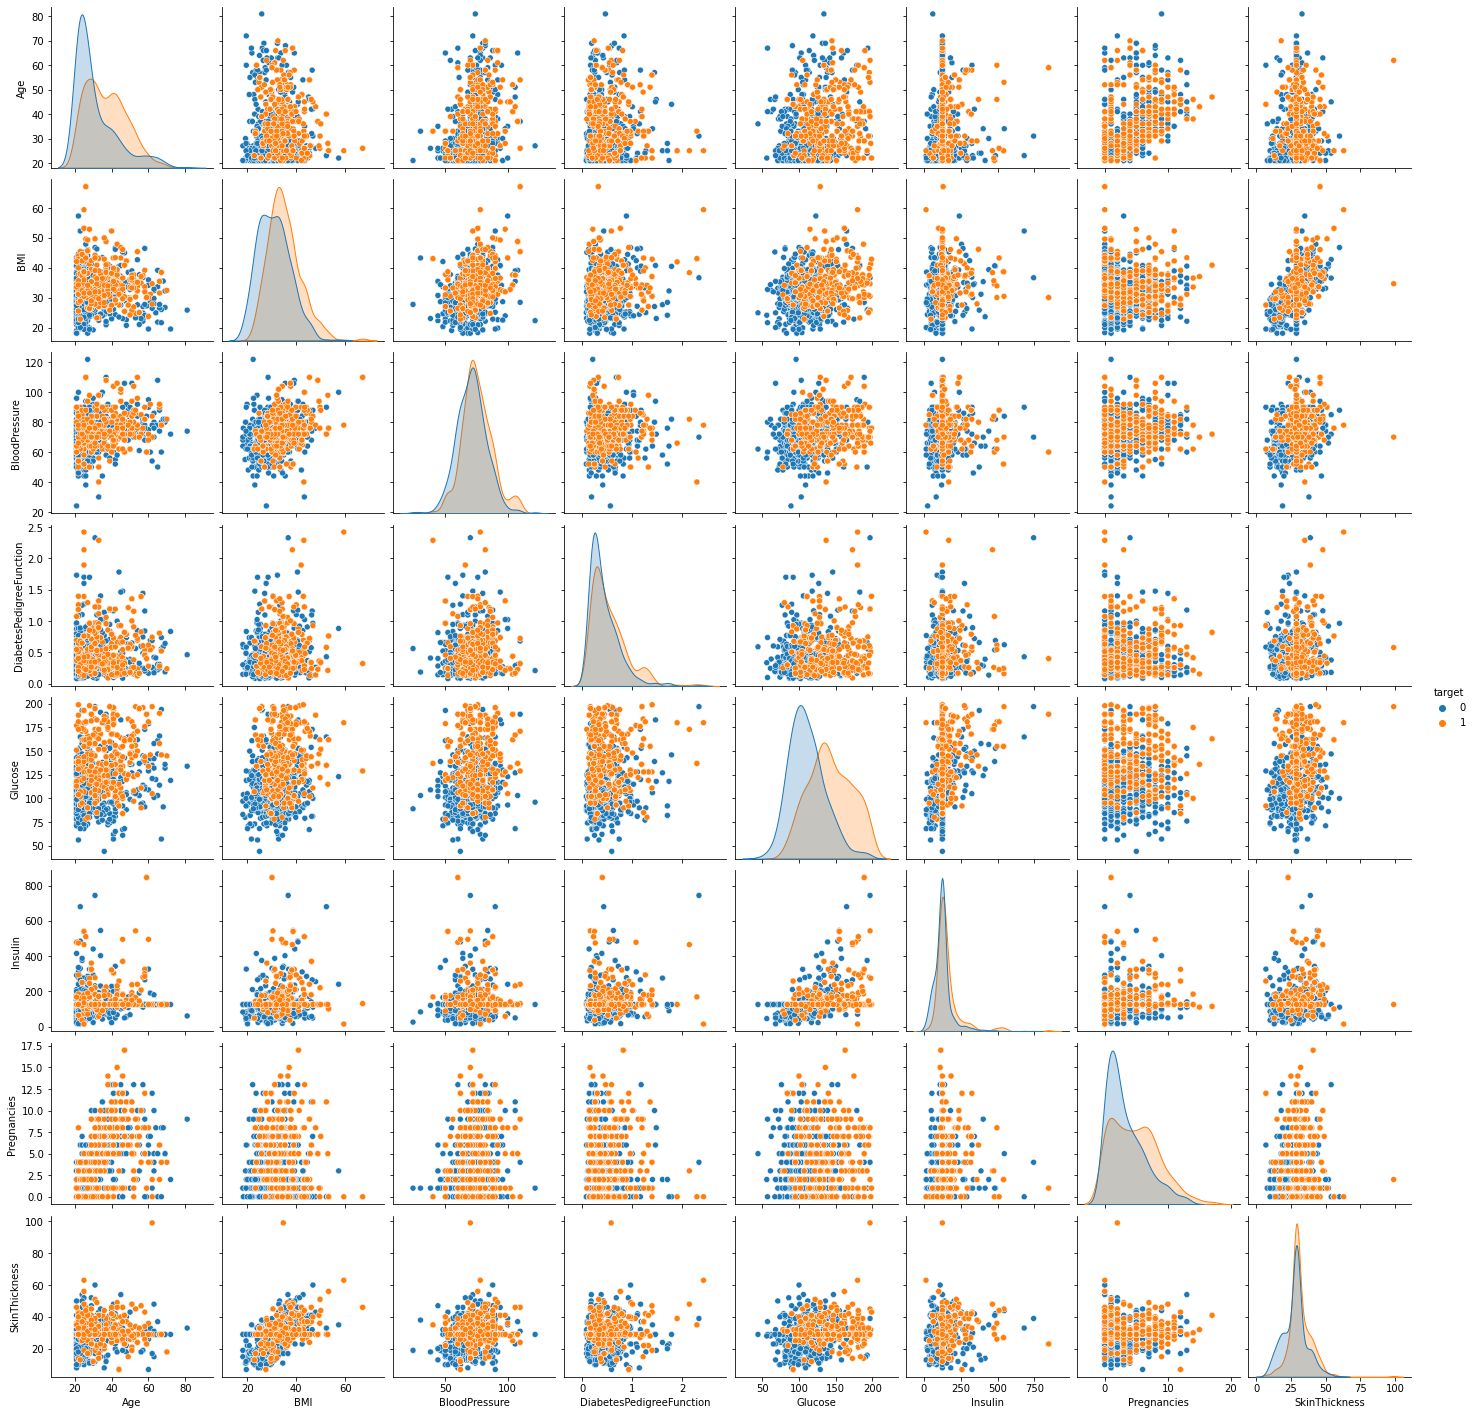

In [101]:
plt.figure(figsize = (25,20))
sns.pairplot(df_data,hue = 'target')
plt.show()

#### Correlation Analysis:

In [102]:
# Correlation between different fatures of the data set using corr() function
round(df_data.corr(),4)

,Age,BMI,BloodPressure,DiabetesPedigreeFunction,Glucose,Insulin,Pregnancies,SkinThickness,target
Age,1.0000,0.0054,0.3144,0.0057,0.2567,0.0958,0.5272,0.0987,0.2502
BMI,0.0054,1.0000,0.3387,0.1316,0.2305,0.1683,-0.0183,0.5320,0.3046
BloodPressure,0.3144,0.3387,1.0000,-0.0170,0.2250,-0.0195,0.1598,0.2146,0.1850
DiabetesPedigreeFunction,0.0057,0.1316,-0.0170,1.0000,0.1121,0.0828,-0.0364,0.1202,0.1545
Glucose,0.2567,0.2305,0.2250,0.1121,1.0000,0.3792,0.1120,0.1785,0.5096
Insulin,0.0958,0.1683,-0.0195,0.0828,0.3792,1.0000,0.0035,0.1228,0.1923
Pregnancies,0.5272,-0.0183,0.1598,-0.0364,0.1120,0.0035,1.0000,0.0498,0.2198
SkinThickness,0.0987,0.5320,0.2146,0.1202,0.1785,0.1228,0.0498,1.0000,0.2177
target,0.2502,0.3046,0.1850,0.1545,0.5096,0.1923,0.2198,0.2177,1.0000


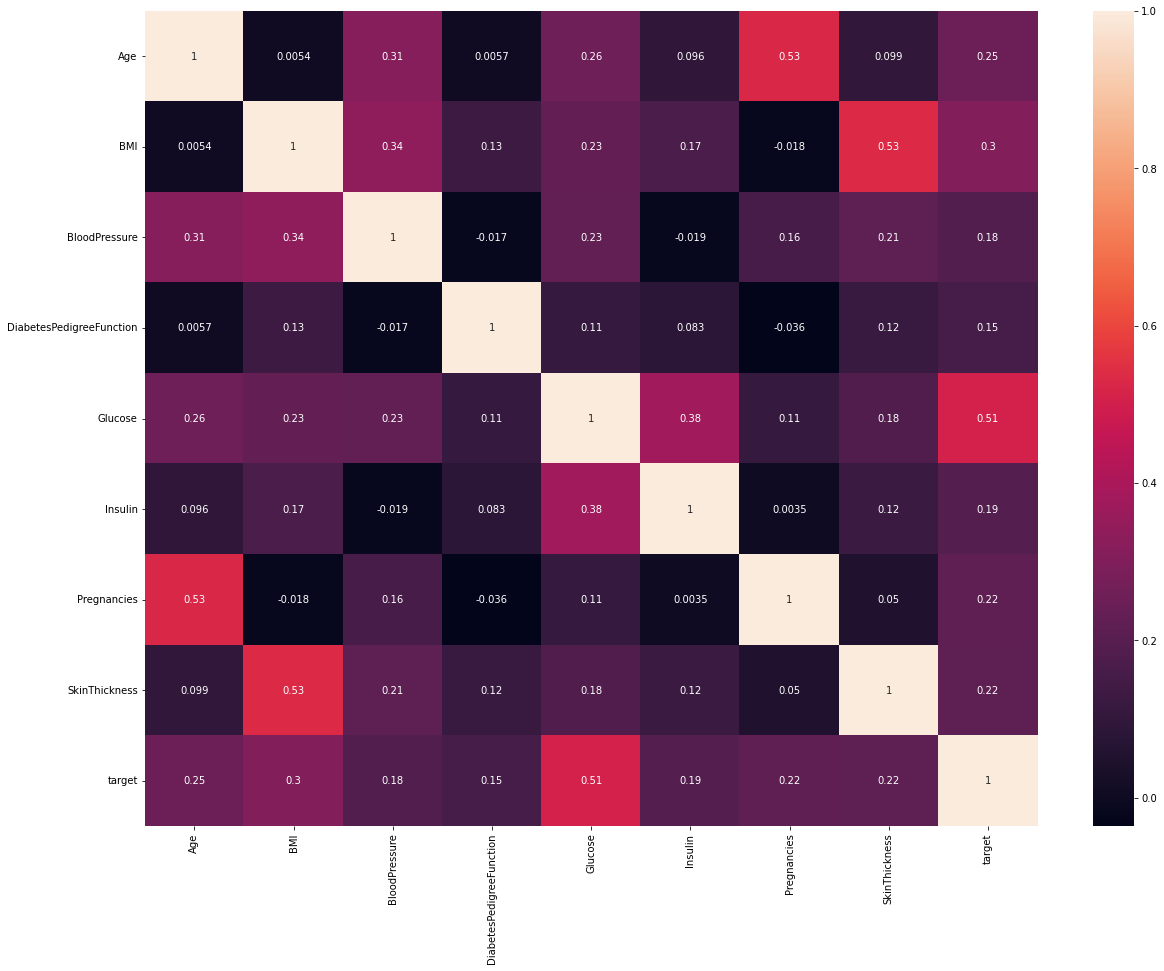

In [103]:
# Visualizing the correlation between the different features with heatmap.
plt.figure(figsize= (20,15))
sns.heatmap(df_data.corr(), annot = True)

### Data Modeling:
Before going for appling any ML algorithm, data to be splitted in to features x and target y. Then data to be split into training data and testing data for training and testing the ML model. Then scaling to be done to bring all the observation to same range.

In [104]:
# storing all the features into x and target variable to y for further analysis.
x = df_data.drop(['target'], axis = 1)
y = df_data.target

In [105]:
#shapes of x and y
print(x.shape,y.shape)

(1000, 8) (1000,)


In [106]:
# splitting the data into training and testing data using train_test_split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.25, random_state= 3)

As the observations range is very high for few features, scaling  to be done for more appropriate reslts. So that one feature may not be dominent influencer of the output. 

In [107]:
# Scaling of the features: here, MinMaxScaler is used for scaling the observations. Range of the features after scaling = (0,1)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range= (0,1))
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
x_train_scaled_df = pd.DataFrame(x_train_scaled, columns= x.columns)
x_test_scaled_df = pd.DataFrame(x_test_scaled, columns= x.columns)

In [108]:
#shape of x_train
x_train_scaled_df.shape


(750, 8)

In [109]:
#shape of x_test 
x_test_scaled_df.shape

(250, 8)

### Logistic regression:
As it is bivarient classification

In [110]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(random_state =3, solver='saga', penalty= 'l2', max_iter= 1e7)

In [111]:
lr_model.fit(x_train_scaled_df, y_train)

LogisticRegression(max_iter=10000000.0, random_state=3, solver='saga')

In [112]:
lr_model.score(x_test_scaled_df, y_test)

0.764

In [113]:
lr_pred = lr_model.predict(x_test_scaled_df)

In [114]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score


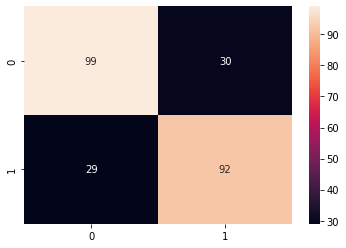

In [115]:
sns.heatmap(confusion_matrix(y_test,lr_pred), annot = True)

In [116]:
lr_accuracy_score = accuracy_score(y_test, lr_pred)
lr_f1_score = f1_score(y_test, lr_pred)
lr_confuse = confusion_matrix(y_test,lr_pred)

### Random Forest Classifier

In [118]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(max_depth= 10, random_state= 3, criterion= 'entropy')

In [119]:
rf_model.fit(x_train_scaled_df, y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, random_state=3)

In [120]:
rf_pred = rf_model.predict(x_test_scaled_df)
rf_model.score(x_test_scaled_df, y_test)

0.856

In [121]:
rf_model.score(x_train_scaled_df, y_train)

0.9773333333333334

In [122]:
rf_confusion_matrix = confusion_matrix(y_test, rf_pred)
rf_confusion_matrix

array([[ 99,  30],
       [  6, 115]])

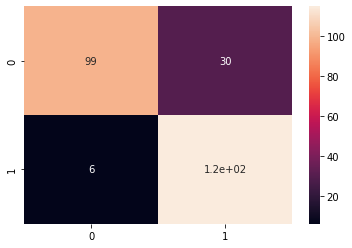

In [123]:
sns.heatmap(confusion_matrix(y_test, rf_pred), annot =True)

In [124]:
rf_accuracy_score = accuracy_score(y_test, rf_pred)
rf_f1_score = f1_score(y_test, rf_pred)

In [125]:
rf_f1_score

0.8646616541353384

In [126]:
rf_accuracy_score

0.856

### KNN algorithm

In [127]:
from sklearn.neighbors import KNeighborsClassifier

To find the optimal K value for KNN model, lets run the loop for K= 1 to 25.
Then lets store the train and test scores in a list for finding optimal K value.

In [128]:
# two empty lists for storing the scores of the train and test data sets for different values of K.
scores_test = []
scores_train = []

In [129]:
for i in range(1,26):
  knn = KNeighborsClassifier(n_neighbors= i)
  knn.fit(x_train_scaled_df, y_train)
  train = knn.score(x_train_scaled_df, y_train)
  scores_train.append(train)
  test = knn.score(x_test_scaled_df, y_test)
  scores_test.append(test)


In [130]:
#Converting the lists to Series and customizing their index values with corresponing K value.
scores_test=pd.Series(scores_test,index= range(1,26))
scores_train=pd.Series(scores_train,index= range(1,26))

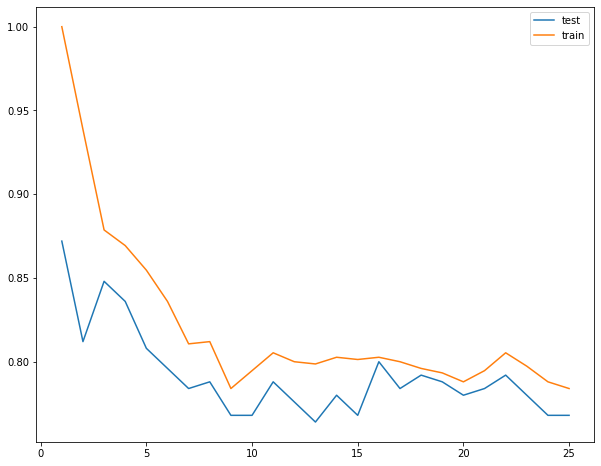

In [149]:
# plotting the graph for the scores for better visualization
plt.figure(figsize=(10,8))
plt.plot(scores_test.index, scores_test.values, label = 'test')
plt.plot(scores_train.index, scores_train.values, label = 'train')
plt.legend()
plt.show()

Lets sort the scores in the sescending order for getting top-5 K values for both training and test.

In [132]:
scores_test.sort_values(ascending = False).head()

1    0.872
3    0.848
4    0.836
2    0.812
5    0.808
dtype: float64

In [133]:
scores_train.sort_values(ascending = False).head()

1    1.000000
2    0.938667
3    0.878667
4    0.869333
5    0.854667
dtype: float64

On comparing the top 5 scores, though at K=1 giving hightest score it can easily leads to over-fitting problem. So the optimal K value will be 3.

#### KNN with K=3

In [134]:
knn_model = KNeighborsClassifier(n_neighbors= 3)
knn_model.fit(x_train_scaled_df, y_train)
knn_pred = knn.predict(x_test_scaled_df)


In [135]:
knn_model.score(x_train_scaled_df, y_train)

0.8786666666666667

In [136]:
knn_model.score(x_test_scaled_df, y_test)

0.848

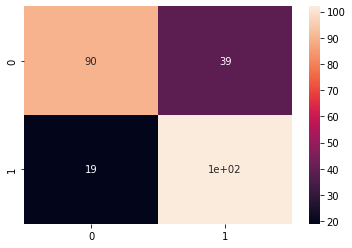

In [137]:
sns.heatmap(confusion_matrix(y_test, knn_pred), annot = True)

In [138]:
knn_accuracy_score = accuracy_score(y_test, knn_pred)
knn_f1_score = f1_score(y_test, knn_pred)

In [139]:
knn_accuracy_score

0.768

In [140]:
knn_f1_score

0.7786259541984732

### Comparision of Models

In [141]:
# creating a list of models considered
models = ['Logistic Regression', 'Random Forest', 'KNN']
models

['Logistic Regression', 'Random Forest', 'KNN']

In [142]:
# creating list of f1_scores for the models considered
f1_scores= [lr_f1_score, rf_f1_score, knn_f1_score]
f1_scores

[0.7572016460905349, 0.8646616541353384, 0.7786259541984732]

In [143]:
# creating list of accuracy_scores for the models considered
accuracy_scores = [lr_accuracy_score, rf_accuracy_score, knn_accuracy_score]
accuracy_scores

[0.764, 0.856, 0.768]

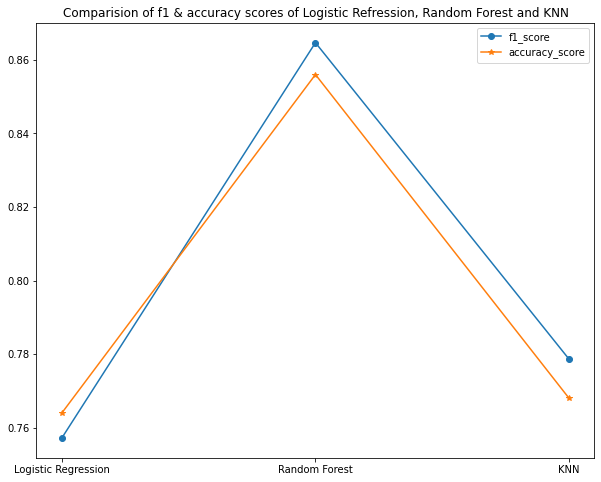

In [150]:
# plotting the graph of f1 & accuracy scores for the camparision of consideed models
plt.figure(figsize=(10,8))
plt.plot(models, f1_scores, label = 'f1_score', marker= 'o')
plt.plot(models, accuracy_scores, label = 'accuracy_score', marker= '*')
plt.legend()
plt.title('Comparision of f1 & accuracy scores of Logistic Refression, Random Forest and KNN')
plt.show()

From the above plot, it can be observed that Random Forest Classifier is having highest f1 and accuracy scores compared to KNN and Logistic Regression. 
Thus, our final model will be **Random Forest Classifier**.

### Selected Classifier

In [145]:
selected_classifier = rf_model

In [146]:
print('confusion matrix of selected classifier:')
print('*'*50)
conf_matrix = confusion_matrix(y_test, selected_classifier.predict(x_test_scaled_df))
print(conf_matrix )

confusion matrix of selected classifier:
**************************************************
[[ 99  30]
 [  6 115]]


In [147]:
print('classification report of selected classifier:')
print('*'*50)
classf_report = classification_report(y_test, selected_classifier.predict(x_test_scaled_df))
print(classf_report )

classification report of selected classifier:
**************************************************
              precision    recall  f1-score   support

           0       0.94      0.77      0.85       129
           1       0.79      0.95      0.86       121

    accuracy                           0.86       250
   macro avg       0.87      0.86      0.86       250
weighted avg       0.87      0.86      0.86       250

